In [1]:
import numpy as np
import pandas as pd
import re
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
quandl.ApiConfig.api_key = "2At3atzXCrMx_BXfkyz7"
# 6b7jcHuxwW7Wot1kyFNS

### Data to be used

In [3]:
metadata = pd.read_csv('BSE_metadata.csv')
metadata.head()

,code,name,description,refreshed_at,from_date,to_date
0,BOM500002,ABB India Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
1,BOM500003,AEGIS LOGISTICS LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
2,BOM500008,AMARA RAJA BATTERIES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
3,BOM500009,AMBALAL SARABHAI ENTERPRISES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
4,BOM500010,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,1/3/1992,1/18/2021


In [4]:
# metadata[metadata['name'].str.contains('sensex', case = False)]

In [5]:
# stocks = ['BOM500034','BOM500180','BOM500510','BOM500520','BOM500696','BOM500820','BOM532500','BOM532977','BOM532215','BOM500247','BOM532187','BOM532174',
# 'BOM500112','BOM532538','BOM500875','BOM500790','BOM500114','BOM500510','BOM500010','BOM532978','BOM500034','BOM532755','BOM532540',
# 'BOM500209','BOM532281','BOM500325','BOM500312','BOM500820','BOM524715','BOM500124','BOM532898','BOM532555']
# indices = ['SENSEX','SI1000','SI1400','SI1900','SIBPSU','SIBTEC','SIPOWE','SIREAL','SPBSCDIP']

stocks = ['BOM532977','BOM532488','BOM500124','BOM500180','BOM500440','BOM532174','BOM500209','BOM500228','BOM500247','BOM532500','BOM532872','BOM570001','BOM500055','BOM532540','BOM507685']
indices = ['SENSEX', 'SI0800','SI1000','SIBANK','SI1200','SI1900']

In [6]:
stockMetadata = metadata[metadata['code'].isin(stocks+indices)]
stockMetadata.head()

,code,name,description,refreshed_at,from_date,to_date
31,BOM500055,Tata Steel Bsl Ltd EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,9/14/2015,1/18/2021
70,BOM500124,DR.REDDY'S LABORATORIES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
104,BOM500180,HDFC Bank Ltd EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/26/1995,1/18/2021
121,BOM500209,INFOSYS LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/2/1995,1/18/2021
133,BOM500228,JSW STEEL LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/2/1995,1/18/2021


In [7]:
print(stockMetadata.shape)
print(stockMetadata[stockMetadata['code'].isin(stocks)].shape)
print(stockMetadata[stockMetadata['code'].isin(indices)].shape)

(21, 6)
(15, 6)
(6, 6)


In [8]:
stockMetadata.loc[:, 'isStock'] = 0
stockMetadata.loc[stockMetadata['code'].isin(stocks), 'isStock'] = 1
stockMetadata.reset_index(inplace=True)
stockMetadata.head()

,index,code,name,description,refreshed_at,from_date,to_date,isStock
0,31,BOM500055,Tata Steel Bsl Ltd EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,9/14/2015,1/18/2021,1
1,70,BOM500124,DR.REDDY'S LABORATORIES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021,1
2,104,BOM500180,HDFC Bank Ltd EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/26/1995,1/18/2021,1
3,121,BOM500209,INFOSYS LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/2/1995,1/18/2021,1
4,133,BOM500228,JSW STEEL LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/2/1995,1/18/2021,1


In [9]:
stockMetadata['isStock'].value_counts()

1    15
0     6
Name: isStock, dtype: int64

In [10]:
# # download the required data - needed only 1 time
# i=0
# code = f'BSE/{stockMetadata.loc[i, "code"]}'
# dataset = quandl.get(code, start_date='2000-01-01', end_date='2021-03-23').sort_values(by='Date', ascending=True)
# dataset['StockName']=stockMetadata.loc[i, 'name']
# dataset['code'] = stockMetadata.loc[i, "code"]
# dataset['isStock'] = stockMetadata.loc[i, "isStock"]

# for i in range(1, len(stockMetadata)):
#     code = f'BSE/{stockMetadata.loc[i, "code"]}'
#     temp = quandl.get(code, start_date='2000-01-01', end_date='2021-03-23').sort_values(by='Date', ascending=True)
#     temp['StockName']=stockMetadata.loc[i, 'name']
#     temp['code'] = stockMetadata.loc[i, "code"]
#     temp['isStock'] = stockMetadata.loc[i, "isStock"]
#     dataset = dataset.append(temp)
# dataset.to_csv('data.csv')
# dataset.head()

BSE/BOM500124 DR.REDDY'S LABORATORIES LTD. EOD Prices (5282, 15)
BSE/BOM500180 HDFC Bank Ltd EOD Prices (5282, 15)
BSE/BOM500209 INFOSYS LTD. EOD Prices (5282, 15)
BSE/BOM500228 JSW STEEL LTD. EOD Prices (5260, 15)
BSE/BOM500247 KOTAK MAHINDRA BANK LTD. EOD Prices (5281, 15)
BSE/BOM500440 HINDALCO INDUSTRIES LTD. EOD Prices (5281, 15)
BSE/BOM507685 WIPRO LTD. EOD Prices (5282, 15)
BSE/BOM532174 ICICI BANK LTD. EOD Prices (5281, 15)
BSE/BOM532488 DIVI'S LABORATORIES LTD. EOD Prices (4484, 15)
BSE/BOM532500 MARUTI SUZUKI INDIA LTD. EOD Prices (4403, 15)
BSE/BOM532540 TATA CONSULTANCY SERVICES LTD. EOD Prices (4115, 15)
BSE/BOM532872 SUN PHARMA ADVANCED RESEARCH COMPANY LTD. EOD Prices (3390, 15)
BSE/BOM532977 BAJAJ AUTO LTD. EOD Prices (3178, 15)
BSE/BOM570001 Tata Motors  Ltd - DVR EOD Prices (2967, 15)
BSE/SENSEX BSE SENSEX (5282, 7)
BSE/SI0800 BSE Healthcare (5282, 7)
BSE/SI1000 BSE Information Technology (5282, 7)
BSE/SI1200 BSE METAL (5282, 7)
BSE/SI1900 BSE AUTO (5282, 7)
BSE/SIBAN

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,StockName,code,isStock
Date,,,,,,,,,,,,,,,
2015-09-14,47.3,48.35,45.50,47.30,47.04,189475.0,1655.0,8913595.0,37811.0,19.96,2.85,0.00,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
2015-09-15,48.2,49.50,47.30,47.65,48.37,158996.0,1106.0,7691358.0,44812.0,28.18,2.20,-0.55,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
2015-09-16,48.0,48.00,46.05,46.45,46.92,62030.0,557.0,2910178.0,22275.0,35.91,1.95,-1.55,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
2015-09-18,46.7,47.15,44.00,44.70,45.41,145082.0,1274.0,6588389.0,61627.0,42.48,3.15,-2.00,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
2015-09-21,44.8,45.40,44.30,44.95,44.86,103869.0,957.0,4659405.0,30783.0,29.64,1.10,0.15,Tata Steel Bsl Ltd EOD Prices,BOM500055,1


In [11]:
dataset = pd.read_csv('data.csv')
dataset.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,StockName,code,isStock
0,2015-09-14,47.3,48.35,45.50,47.30,47.04,189475.0,1655.0,8913595.0,37811.0,19.96,2.85,0.00,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
1,2015-09-15,48.2,49.50,47.30,47.65,48.37,158996.0,1106.0,7691358.0,44812.0,28.18,2.20,-0.55,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
2,2015-09-16,48.0,48.00,46.05,46.45,46.92,62030.0,557.0,2910178.0,22275.0,35.91,1.95,-1.55,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
3,2015-09-18,46.7,47.15,44.00,44.70,45.41,145082.0,1274.0,6588389.0,61627.0,42.48,3.15,-2.00,Tata Steel Bsl Ltd EOD Prices,BOM500055,1
4,2015-09-21,44.8,45.40,44.30,44.95,44.86,103869.0,957.0,4659405.0,30783.0,29.64,1.10,0.15,Tata Steel Bsl Ltd EOD Prices,BOM500055,1


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97328 entries, 0 to 97327
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       97328 non-null  object 
 1   Open                       87009 non-null  float64
 2   High                       87009 non-null  float64
 3   Low                        87009 non-null  float64
 4   Close                      97328 non-null  float64
 5   WAP                        66134 non-null  float64
 6   No. of Shares              66134 non-null  float64
 7   No. of Trades              66134 non-null  float64
 8   Total Turnover             66134 non-null  float64
 9   Deliverable Quantity       61623 non-null  float64
 10  % Deli. Qty to Traded Qty  61623 non-null  float64
 11  Spread H-L                 66134 non-null  float64
 12  Spread C-O                 66134 non-null  float64
 13  StockName                  97328 non-null  obj

In [13]:
dataset.groupby(['code', 'StockName']).agg({'Date': ['min', 'max']})

Date  \
                                                                     min   
code      StockName                                                        
BOM500055 Tata Steel Bsl Ltd EOD Prices                       2015-09-14   
BOM500124 DR.REDDY'S LABORATORIES LTD. EOD Prices             2000-01-03   
BOM500180 HDFC Bank Ltd EOD Prices                            2000-01-03   
BOM500209 INFOSYS LTD. EOD Prices                             2000-01-03   
BOM500228 JSW STEEL LTD. EOD Prices                           2000-01-03   
BOM500247 KOTAK MAHINDRA BANK LTD. EOD Prices                 2000-01-03   
BOM500440 HINDALCO INDUSTRIES LTD. EOD Prices                 2000-01-03   
BOM507685 WIPRO LTD. EOD Prices                               2000-01-03   
BOM532174 ICICI BANK LTD. EOD Prices                          2000-01-03   
BOM532488 DIVI'S LABORATORIES LTD. EOD Prices                 2003-03-12   
BOM532500 MARUTI SUZUKI INDIA LTD. EOD Prices                 2003-07-09   
BOM532540 TATA CONSULTANCY SERVICES LTD. EOD Prices           2004-08-25   
BOM532872 SUN PHARMA ADVANCED RESEARCH COMPANY LTD. EOD P...  2007-07-18   
BOM532977 BAJAJ AUTO LTD. EOD Prices                          2008-05-26   
BOM570001 Tata Motors  Ltd - DVR EOD Prices                   2008-11-05   
SENSEX    BSE SENSEX                                          2000-01-03   
SI0800    BSE Healthcare                                      2000-01-03   
SI1000    BSE Information Technology                          2000-01-03   
SI1200    BSE METAL                                           2000-01-03   
SI1900    BSE AUTO                                            2000-01-03   
SIBANK    BSE BANKEX                                          2002-01-01   

                                                                          
                                                                     max  
code      StockName                                                       
BOM500055 Tata Steel Bsl Ltd EOD Prices                       2021-03-23  
BOM500124 DR.REDDY'S LABORATORIES LTD. EOD Prices             2021-03-23  
BOM500180 HDFC Bank Ltd EOD Prices                            2021-03-23  
BOM500209 INFOSYS LTD. EOD Prices                             2021-03-23  
BOM500228 JSW STEEL LTD. EOD Prices                           2021-03-23  
BOM500247 KOTAK MAHINDRA BANK LTD. EOD Prices                 2021-03-23  
BOM500440 HINDALCO INDUSTRIES LTD. EOD Prices                 2021-03-23  
BOM507685 WIPRO LTD. EOD Prices                               2021-03-23  
BOM532174 ICICI BANK LTD. EOD Prices                          2021-03-23  
BOM532488 DIVI'S LABORATORIES LTD. EOD Prices                 2021-03-23  
BOM532500 MARUTI SUZUKI INDIA LTD. EOD Prices                 2021-03-23  
BOM532540 TATA CONSULTANCY SERVICES LTD. EOD Prices           2021-03-23  
BOM532872 SUN PHARMA ADVANCED RESEARCH COMPANY LTD. EOD P...  2021-03-23  
BOM532977 BAJAJ AUTO LTD. EOD Prices                          2021-03-23  
BOM570001 Tata Motors  Ltd - DVR EOD Prices                   2021-03-23  
SENSEX    BSE SENSEX                                          2021-03-23  
SI0800    BSE Healthcare                                      2021-03-23  
SI1000    BSE Information Technology                          2021-03-23  
SI1200    BSE METAL                                           2021-03-23  
SI1900    BSE AUTO                                            2021-03-23  
SIBANK    BSE BANKEX                                          2021-03-23

In [14]:
sensex_closing = dataset.loc[dataset.code=='SENSEX' , ['Date', 'Close']]
sensex_closing.head()

,Date,Close
66134,2000-01-03,5375.11
66135,2000-01-04,5491.01
66136,2000-01-05,5357.00
66137,2000-01-06,5421.53
66138,2000-01-07,5414.48


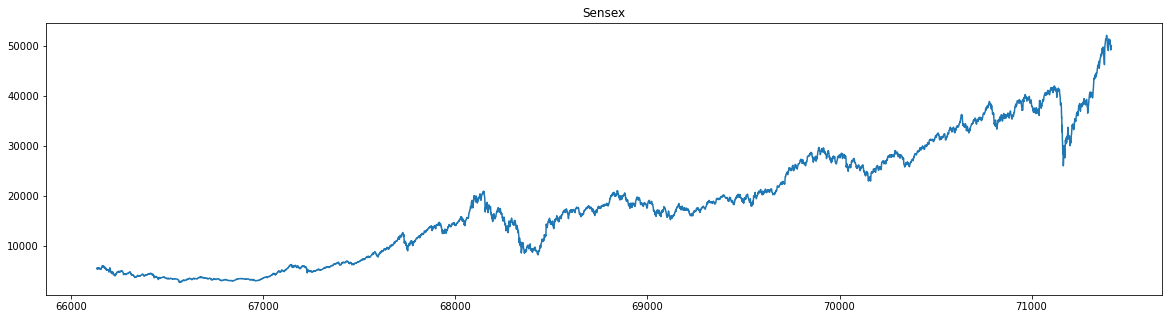

In [15]:
sensex_closing.Close.plot(figsize=(20, 5), title="Sensex")
plt.show()